In [60]:

from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='176E-pLhoxTgWsJ3MeoJQV_GXczIA6g8D',
                                    dest_path='/content/animals.zip',
                                    unzip=True)
#Downloading the data files

Downloading data files using the module Google Drive Downloader

In [61]:
#importing necessary libraries
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [62]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory                   #importing libraries

image_size = (284, 284)                                                                   #Size of the image
batch_size = 32

train_ds = image_dataset_from_directory(
    "animal_dataset_intermediate/train",
    labels = "inferred",
    label_mode = 'int',                                                                    
    validation_split=0.2,
    subset="training",                                                                #Obtaining the train set from the Downloaded dataset
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds =image_dataset_from_directory(
    "animal_dataset_intermediate/train",
    labels = "inferred",
    label_mode = 'int',
    validation_split=0.2,                                                          #Obtaining the validation set from the Downloaded dataset
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size
)

Found 8196 files belonging to 5 classes.
Using 6557 files for training.
Found 8196 files belonging to 5 classes.
Using 1639 files for validation.


The data belong to only five clases .Hence the output layer is Built with five perceptrons

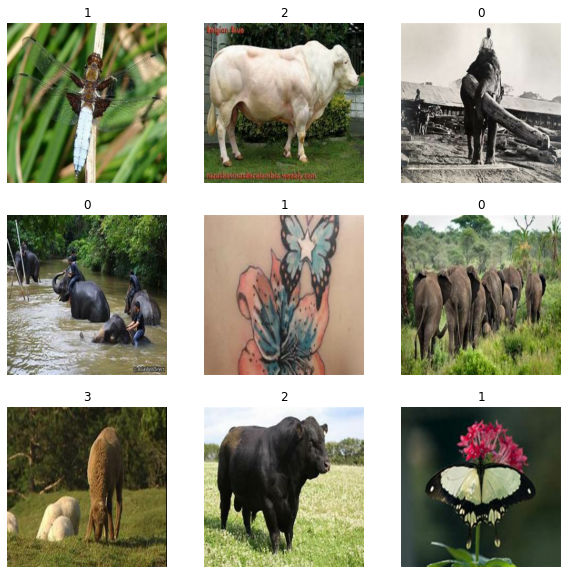

In [63]:

#visualizing the data
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


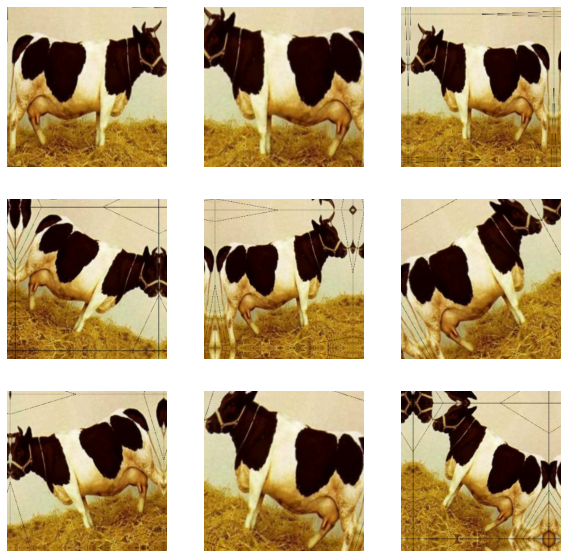

In [64]:
#Augmenting the images
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
        tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
    ]
)

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(2):
    for i in range(9):
        augmented_images = data_augmentation(images)                                   #visualizes data in different positions
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

CONVERSION OF IMAGES INTO NUMERICS

In [65]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255., # rescaling
                                   rotation_range = 40,  # for augmentation
                                   width_shift_range = 0.2,
                                   validation_split = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,                                                                   #CONVERT THE Images into numbers
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255.,validation_split = 0.2)



train_generator = train_datagen.flow_from_directory("animal_dataset_intermediate/train/",
                                                    batch_size = 32,
                                                    subset="training",
                                                    class_mode = 'binary', 
                                                    target_size = (284, 284))


val_generator = val_datagen.flow_from_directory("animal_dataset_intermediate/train/",
                                                subset = "validation",
                                                    batch_size = 32,                                             #splitting of validation data from train data
                                                    class_mode = 'binary', 
                                                    target_size = (284, 284))

Found 6558 images belonging to 5 classes.
Found 1638 images belonging to 5 classes.


In [66]:
print(train_generator[0])

(array([[[[0.33867058, 0.30729803, 0.29553333],
         [0.339035  , 0.30766246, 0.29589772],
         [0.3393994 , 0.30802685, 0.29626215],
         ...,
         [0.5737814 , 0.6561343 , 0.72280097],
         [0.57906955, 0.66142255, 0.7280892 ],
         [0.5803166 , 0.66266954, 0.72933626]],

        [[0.3710886 , 0.33971605, 0.32795134],
         [0.36489365, 0.3335211 , 0.3217564 ],
         [0.3586987 , 0.32732615, 0.31556144],
         ...,
         [0.5739754 , 0.6563283 , 0.722995  ],
         [0.57967544, 0.6620284 , 0.72869503],
         [0.57784176, 0.6601947 , 0.72686136]],

        [[0.399498  , 0.36812544, 0.35636073],
         [0.4005912 , 0.36921865, 0.35745394],
         [0.40168443, 0.3703119 , 0.35854718],
         ...,
         [0.58654916, 0.6689021 , 0.73556876],
         [0.5940623 , 0.67641526, 0.7430819 ],
         [0.59580296, 0.6781559 , 0.74482256]],

        ...,

        [[0.27058825, 0.29803923, 0.32941177],
         [0.27058825, 0.29803923, 0.32941177

In [67]:
#Building of a CNN model with multiple layer architecture
from tensorflow.keras.layers import Input, Conv2D, Dense, Activation, Flatten, Dropout, MaxPooling2D, BatchNormalization# define input shape
INPUT_SHAPE = (284, 284, 3)
from tensorflow.keras import regularizers

# define sequential model
model = tf.keras.models.Sequential()
# define conv-pool layers - set 1
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), 
                                activation='elu', padding='valid',kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(1e-4), input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# define conv-pool layers - set 2
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), 
                                activation='elu', padding='valid',kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(1e-4), input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), 
                                activation='elu', padding='valid',kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(1e-4), input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), 
                                activation='elu', padding='valid',kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(1e-4), input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# add flatten layer
model.add(tf.keras.layers.Flatten())

# add dense layers with some dropout
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.3))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.3))

# add output layer
model.add(tf.keras.layers.Dense(5, activation='softmax'))


In [68]:
# compile model
from tensorflow.keras import optimizers
optimizer = optimizers.Adam(lr = 0.001, decay = 1e-5) 
model.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])





In [69]:

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 282, 282, 64)      1792      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 141, 141, 64)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 139, 139, 32)      18464     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 69, 69, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 67, 67, 16)        4624      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 33, 33, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 31, 31, 8)        

In [70]:

es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, 
                                               restore_best_weights=True,                        #Use of Early Stopping
                                               verbose=1)

In [71]:
 model.fit_generator(
    train_generator, 
    validation_data=val_generator,
    epochs=100,verbose=1,
    callbacks = [es_callback]                                                                 #fitting the model
)

Epoch 1/100
205/205 [==============================] - 129s 627ms/step - loss: 1.6927 - accuracy: 0.3835 - val_loss: 2.0878 - val_accuracy: 0.3834
Epoch 2/100
205/205 [==============================] - 127s 620ms/step - loss: 1.3121 - accuracy: 0.4765 - val_loss: 22.9385 - val_accuracy: 0.2320
Epoch 3/100
205/205 [==============================] - 128s 623ms/step - loss: 1.3606 - accuracy: 0.4597 - val_loss: 1.1973 - val_accuracy: 0.5226
Epoch 4/100
205/205 [==============================] - 127s 621ms/step - loss: 1.1466 - accuracy: 0.5444 - val_loss: 1.3949 - val_accuracy: 0.4908
Epoch 5/100
205/205 [==============================] - 127s 621ms/step - loss: 1.1103 - accuracy: 0.5500 - val_loss: 0.9817 - val_accuracy: 0.6355
Epoch 6/100
205/205 [==============================] - 127s 619ms/step - loss: 1.0505 - accuracy: 0.5871 - val_loss: 1.6704 - val_accuracy: 0.4774
Epoch 7/100
205/205 [==============================] - 126s 615ms/step - loss: 1.0324 - accuracy: 0.5985 - val_loss: 

In [72]:
predictor = model.predict_generator(test_img)
print(predictor)

[[3.57003580e-03 9.72729683e-01 6.71693415e-04 3.49360076e-03
  1.95349362e-02]
 [9.63128433e-02 3.97134691e-01 2.53202692e-02 7.56583065e-02
  4.05573875e-01]
 [1.07116317e-02 8.04808378e-01 9.90184210e-03 2.79712528e-02
  1.46606937e-01]
 ...
 [1.97279956e-02 8.98142338e-01 1.13927305e-03 7.84919411e-03
  7.31411427e-02]
 [4.06422988e-02 8.77649307e-01 3.08456924e-03 1.03502525e-02
  6.82735294e-02]
 [6.56816959e-02 7.78458536e-01 5.72279189e-03 1.58522148e-02
  1.34284705e-01]]


In [73]:
model.evaluate(train_generator)

205/205 [==============================] - 119s 581ms/step - loss: 1.0205 - accuracy: 0.6096


[1.020519733428955, 0.6096370816230774]

In [74]:
form=np.argmax(predictor,axis=1) 
form.shape

(910,)

In [75]:
output_result=pd.DataFrame(form)
output_result.head()

,0
0,1
1,4
2,1
3,1
4,1


In [76]:
output_result= output_result.replace([0,1,2,3,4],["elefante","farfalla","mucca","pecora","scoiattolo"])
print (output_result)

              0
0      farfalla
1    scoiattolo
2      farfalla
3      farfalla
4      farfalla
..          ...
905    farfalla
906  scoiattolo
907    farfalla
908    farfalla
909    farfalla

[910 rows x 1 columns]


In [77]:
array=[]
for i in range(len(output_result)):
  array.append(output_result[0][i])
print(array)

['farfalla', 'scoiattolo', 'farfalla', 'farfalla', 'farfalla', 'farfalla', 'elefante', 'scoiattolo', 'scoiattolo', 'pecora', 'scoiattolo', 'elefante', 'elefante', 'elefante', 'pecora', 'farfalla', 'scoiattolo', 'farfalla', 'pecora', 'farfalla', 'elefante', 'scoiattolo', 'scoiattolo', 'scoiattolo', 'farfalla', 'pecora', 'scoiattolo', 'farfalla', 'farfalla', 'farfalla', 'farfalla', 'farfalla', 'pecora', 'farfalla', 'scoiattolo', 'scoiattolo', 'elefante', 'farfalla', 'farfalla', 'farfalla', 'farfalla', 'elefante', 'farfalla', 'farfalla', 'scoiattolo', 'farfalla', 'scoiattolo', 'scoiattolo', 'elefante', 'elefante', 'scoiattolo', 'farfalla', 'farfalla', 'farfalla', 'scoiattolo', 'farfalla', 'farfalla', 'farfalla', 'farfalla', 'farfalla', 'farfalla', 'farfalla', 'farfalla', 'farfalla', 'scoiattolo', 'scoiattolo', 'pecora', 'scoiattolo', 'farfalla', 'farfalla', 'farfalla', 'farfalla', 'farfalla', 'farfalla', 'scoiattolo', 'farfalla', 'scoiattolo', 'farfalla', 'farfalla', 'farfalla', 'farfalla

In [78]:
final_result=pd.DataFrame(array)
final_result.head()

,0
0,farfalla
1,scoiattolo
2,farfalla
3,farfalla
4,farfalla


In [79]:
# To download the csv file locally
from google.colab import files           #importing files library
result.to_csv('cnn_result.csv')     #converting the res dataframe into an prediction_results csv file
files.download('cnn_result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Use of Transfer learning reduces the time spent on building and  training a modl from scratch.It reduces time as well as it produces a better accuracy when compared to a CNN model built entirely from scratch.Hence here we use VGG19 model for image recognition

In [80]:
import cv2
import pandas as pd
test_file=pd.read_csv('/content/animal_dataset_intermediate/Testing_set_animals.csv')
test_img=[]
for i in test_file['filename']:                                                                    #Loading test data
  n=cv2.imread('animal_dataset_intermediate/test/'+i)
  r=cv2.resize(n,(284,284))
  test_img.append(r)



In [81]:
from keras.preprocessing.image import ImageDataGenerator                                   #Conversion of images into numerics
test_data_gen = ImageDataGenerator(rescale=1.0/255.0)

In [82]:
test_data_gen.fit(test_img)

In [83]:
test_img[0]

array([[[118, 147, 151],
        [119, 148, 152],
        [121, 149, 153],
        ...,
        [ 70, 129, 109],
        [ 69, 128, 108],
        [ 69, 128, 108]],

       [[118, 147, 151],
        [120, 149, 153],
        [121, 150, 154],
        ...,
        [ 70, 129, 109],
        [ 70, 129, 109],
        [ 69, 128, 108]],

       [[118, 147, 151],
        [119, 148, 152],
        [120, 149, 153],
        ...,
        [ 72, 128, 109],
        [ 71, 127, 108],
        [ 69, 125, 106]],

       ...,

       [[ 82, 162, 163],
        [ 82, 162, 163],
        [ 82, 162, 163],
        ...,
        [ 95, 142, 156],
        [ 95, 142, 156],
        [ 95, 142, 156]],

       [[ 81, 161, 162],
        [ 81, 161, 162],
        [ 80, 160, 161],
        ...,
        [ 95, 141, 156],
        [ 94, 141, 155],
        [ 95, 142, 156]],

       [[ 80, 160, 161],
        [ 80, 160, 161],
        [ 80, 160, 161],
        ...,
        [ 94, 141, 155],
        [ 94, 141, 155],
        [ 94, 141, 155]]

In [84]:
test_img = np.array(test_img)

In [85]:
test_img=test_img/255                                         #Normalizing

In [86]:

test_img

array([[[[0.4627451 , 0.57647059, 0.59215686],
         [0.46666667, 0.58039216, 0.59607843],
         [0.4745098 , 0.58431373, 0.6       ],
         ...,
         [0.2745098 , 0.50588235, 0.42745098],
         [0.27058824, 0.50196078, 0.42352941],
         [0.27058824, 0.50196078, 0.42352941]],

        [[0.4627451 , 0.57647059, 0.59215686],
         [0.47058824, 0.58431373, 0.6       ],
         [0.4745098 , 0.58823529, 0.60392157],
         ...,
         [0.2745098 , 0.50588235, 0.42745098],
         [0.2745098 , 0.50588235, 0.42745098],
         [0.27058824, 0.50196078, 0.42352941]],

        [[0.4627451 , 0.57647059, 0.59215686],
         [0.46666667, 0.58039216, 0.59607843],
         [0.47058824, 0.58431373, 0.6       ],
         ...,
         [0.28235294, 0.50196078, 0.42745098],
         [0.27843137, 0.49803922, 0.42352941],
         [0.27058824, 0.49019608, 0.41568627]],

        ...,

        [[0.32156863, 0.63529412, 0.63921569],
         [0.32156863, 0.63529412, 0.63921569]

In [87]:
vgg_layers = tf.keras.applications.vgg19.VGG19(weights='imagenet', include_top=False,    
                                               input_shape=(284,284,3))  #importing VGG19model

In [88]:
vgg_layers.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 284, 284, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 284, 284, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 284, 284, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 142, 142, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 142, 142, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 142, 142, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 71, 71, 128)       0     

In [89]:

# Fine-tune all the layers
for layer in vgg_layers.layers:
    layer.trainable = True

# Check the trainable status of the individual layers
for layer in vgg_layers.layers:
    print(layer, layer.trainable)


<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f076d849128> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f076d849710> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f076d849f28> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f076d83dcf8> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f076cdd27f0> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f076cdd2780> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f076cdc1ac8> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f076cdc16a0> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f076cdd2b38> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f076cdced30> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f076cdcedd8> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f076d8ee

In [90]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Activation, Flatten, Dropout, MaxPooling2D, BatchNormalization
model = tf.keras.models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_layers)


# add flatten layer
model.add(tf.keras.layers.Flatten())

# add dense layers with some dropout
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.3))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))


# add output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# view model layers
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 8, 8, 512)         20024384  
_________________________________________________________________
flatten_5 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               8388864   
_________________________________________________________________
batch_normalization_9 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)              

In [91]:

es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, 
                                               restore_best_weights=True,                        #Use of Early Stopping
                                               verbose=1)

In [92]:
history = model.fit_generator(
    train_generator, 
    validation_data=val_generator,
    epochs=60,verbose=1,
    callbacks = [es_callback]                                                                 #fitting the model
)

Epoch 1/60
205/205 [==============================] - 202s 986ms/step - loss: 2.1807 - accuracy: 0.2908 - val_loss: 1.3877 - val_accuracy: 0.5476
Epoch 2/60
205/205 [==============================] - 201s 979ms/step - loss: 1.3187 - accuracy: 0.5685 - val_loss: 0.7245 - val_accuracy: 0.7711
Epoch 3/60
205/205 [==============================] - 201s 979ms/step - loss: 0.9209 - accuracy: 0.7208 - val_loss: 0.5270 - val_accuracy: 0.8254
Epoch 4/60
205/205 [==============================] - 200s 976ms/step - loss: 0.6847 - accuracy: 0.7961 - val_loss: 0.4058 - val_accuracy: 0.8675
Epoch 5/60
205/205 [==============================] - 200s 976ms/step - loss: 0.5264 - accuracy: 0.8518 - val_loss: 0.3028 - val_accuracy: 0.9023
Epoch 6/60
205/205 [==============================] - 199s 972ms/step - loss: 0.4229 - accuracy: 0.8794 - val_loss: 0.2257 - val_accuracy: 0.9316
Epoch 7/60
205/205 [==============================] - 198s 968ms/step - loss: 0.3462 - accuracy: 0.9021 - val_loss: 0.3910 -

In [93]:
model.evaluate(train_generator)

205/205 [==============================] - 131s 639ms/step - loss: 0.0819 - accuracy: 0.9751


[0.08192983269691467, 0.9751448631286621]

In [94]:
predict = model.predict_generator(test_img)

In [95]:
print(predict)

[[2.5023613e-04 9.9492848e-01 5.8757793e-04 ... 2.2853941e-04
  3.9679918e-04 4.5696707e-04]
 [2.9349394e-04 9.9551636e-01 5.2090036e-04 ... 2.1427346e-04
  1.6993837e-04 4.7557193e-04]
 [7.9498732e-06 9.9966609e-01 6.8396941e-05 ... 2.0443706e-05
  1.3299877e-05 5.7604291e-05]
 ...
 [1.0564733e-02 2.0391168e-02 8.5531995e-03 ... 2.8932507e-03
  3.9189500e-03 4.7515491e-03]
 [4.9431564e-04 6.8940787e-04 5.7778705e-04 ... 6.7171422e-05
  2.0285773e-04 1.1787490e-04]
 [1.7981521e-04 3.9746898e-04 2.5271074e-04 ... 5.3341315e-05
  8.0217578e-05 6.2349172e-05]]


In [96]:
data=np.argmax(predict,axis=1) 
data.shape

(910,)

In [97]:
result=pd.DataFrame(data)
result

,0
0,1
1,1
2,1
3,1
4,1
...,...
905,4
906,4
907,4
908,4


In [98]:
result= result.replace([0,1,2,3,4],["elefante","farfalla","mucca","pecora","scoiattolo"])
print (result)

              0
0      farfalla
1      farfalla
2      farfalla
3      farfalla
4      farfalla
..          ...
905  scoiattolo
906  scoiattolo
907  scoiattolo
908  scoiattolo
909  scoiattolo

[910 rows x 1 columns]


In [99]:
arrray=[]
for i in range(len(result)):
  arrray.append(result[0][i])
print(arrray)

['farfalla', 'farfalla', 'farfalla', 'farfalla', 'farfalla', 'farfalla', 'elefante', 'pecora', 'pecora', 'pecora', 'pecora', 'elefante', 'elefante', 'elefante', 'pecora', 'farfalla', 'elefante', 'elefante', 'pecora', 'farfalla', 'elefante', 'elefante', 'pecora', 'pecora', 'pecora', 'pecora', 'elefante', 'farfalla', 'farfalla', 'farfalla', 'pecora', 'pecora', 'pecora', 'pecora', 'pecora', 'elefante', 'pecora', 'pecora', 'pecora', 'farfalla', 'farfalla', 'pecora', 'farfalla', 'pecora', 'pecora', 'elefante', 'elefante', 'elefante', 'elefante', 'elefante', 'elefante', 'farfalla', 'farfalla', 'farfalla', 'pecora', 'farfalla', 'pecora', 'elefante', 'farfalla', 'pecora', 'pecora', 'farfalla', 'farfalla', 'farfalla', 'pecora', 'farfalla', 'pecora', 'farfalla', 'farfalla', 'pecora', 'pecora', 'farfalla', 'pecora', 'pecora', 'pecora', 'farfalla', 'elefante', 'elefante', 'farfalla', 'farfalla', 'farfalla', 'farfalla', 'farfalla', 'elefante', 'farfalla', 'farfalla', 'pecora', 'elefante', 'elefante

In [102]:
result=pd.DataFrame(arrray)
result.head()

,0
0,farfalla
1,farfalla
2,farfalla
3,farfalla
4,farfalla


In [101]:
# To download the csv file locally
from google.colab import files           #importing files library
result.to_csv('prediction_result.csv')     #converting the res dataframe into an prediction_results csv file
files.download('prediction_result.csv') #down;oading the csv file

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>